## imports

In [35]:
#Imports which i took from the model_evaluation notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance
import warnings
warnings.simplefilter(action="ignore")

# baseline first iteration

In [2]:
#importing the file
iter1 = pd.read_pickle("data/iter1.pkl")  

In [3]:
iter1

,bloc_id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,3
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1


In [4]:
#defining x and y for the dummy model
y = iter1["median_house_value"]
x = iter1.drop("median_house_value", axis=1)

In [5]:
# instantiate Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(x, y)

# calculate the score
dummy_clf.score(x, y)

0.04620881782945736

# second iteration model

In [40]:
iter2 = pd.read_pickle("data/iter2.pkl")
iter2

,bloc_id,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0
1,10600,-117.80,33.68,2032.0,349.0,862.0,340.0,6.9133,274100.0,1
2,2494,-120.19,36.60,875.0,214.0,931.0,214.0,1.5536,58300.0,0
3,4284,-118.32,34.10,622.0,229.0,597.0,227.0,1.5284,200000.0,1
4,16541,-121.23,37.79,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0
...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,1465.0,278.0,745.0,250.0,3.0625,93800.0,0
16508,18898,-122.25,38.11,2365.0,504.0,1131.0,458.0,2.6133,103100.0,3
16509,11798,-121.22,38.92,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0
16510,6637,-118.14,34.16,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1


In [41]:
def Lineareg(data):
    y = data["median_house_value"]
    X = data.drop("median_house_value", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    K = []
    total_time = []
    score = []
    for k in range(2,40):
        cross_val_results = cross_validate(model, X, y, cv=k)
        total_time.append(sum(cross_val_results['fit_time'])+sum(cross_val_results['score_time']))
        K.append(k)
        score.append(cross_val_results['test_score'].mean())
    plt.plot(K, score, label = 'Score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('K', fontsize = 14)
    plt.title('K vs Score', fontsize = 18, y = 1.03)
    plt.legend()

0.6234551981760668


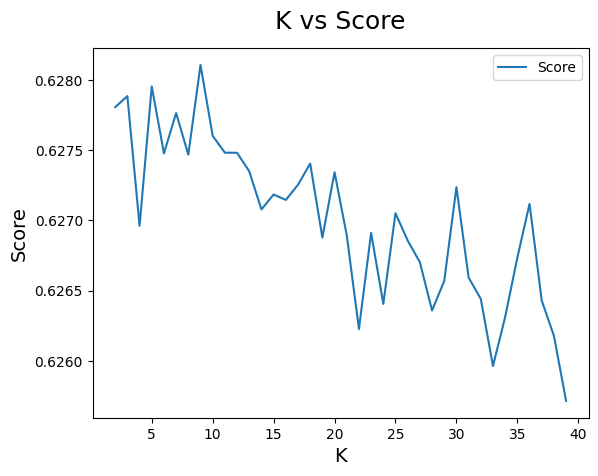

In [42]:
Lineareg(iter2)

In [43]:
# evaluating my model using cross validation with 10 folds
cv_results = cross_validate(model, 
                            X, y, 
                            cv=10
                           )

#mean of the test score
cv_results['test_score'].mean()

0.6276010011997435